In [1]:
from finlab.data import Data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import talib
from talib import  abstract

In [11]:
data = Data()
price = data.get('收盤價',600) 

In [12]:
benchmark = price['0050']
benchmark.head()

date
2016-05-17    60.05
2016-05-18    59.95
2016-05-19    59.65
2016-05-20    60.00
2016-05-23    62.00
Name: 0050, dtype: float64

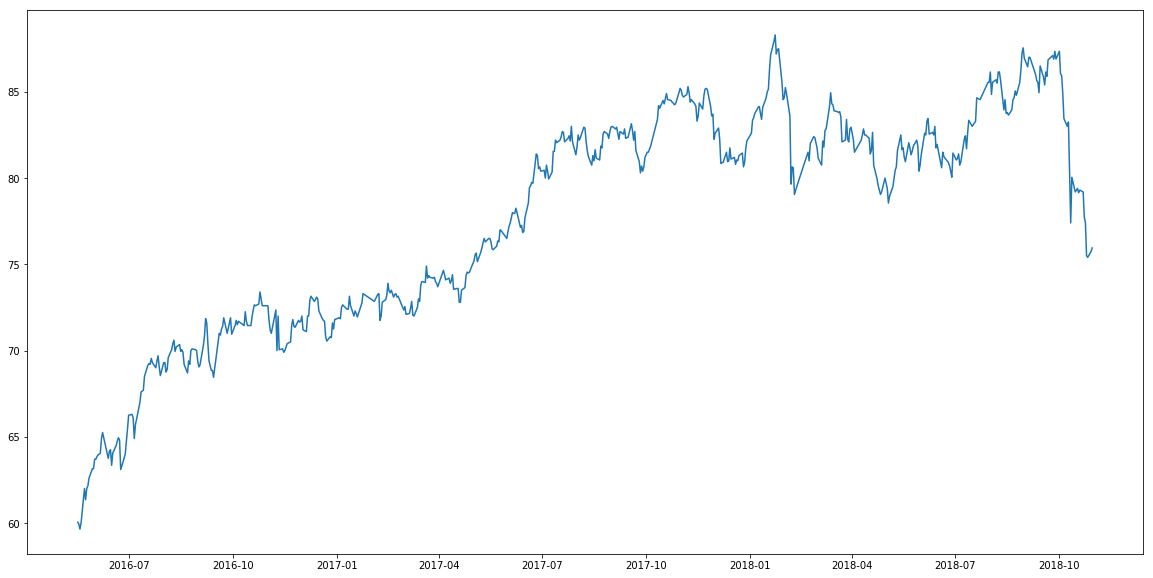

In [13]:
plt.plot(benchmark)

In [14]:
import pandas as pd
import sqlite3
import os

# connect to sql
conn = sqlite3.connect(os.path.join('data', "data.db"))

# read data from sql
df = pd.read_sql('select stock_id, date, 開盤價, 收盤價, 最高價, 最低價, 成交股數 from price where stock_id="0050"', conn,
                index_col=['date'], parse_dates=['date'])

# rename the columns of dataframe
df.rename(columns={'收盤價':'close', '開盤價':'open', '最高價':'high', '最低價':'low', '成交股數':'volume'}, inplace=True)
# df.rename(columns={'收盤價':'close','開盤價','open'})

In [15]:
import sqlite3
import os

conn = sqlite3.connect(os.path.join('data' , 'data.db'))

df = pd.read_sql('select stock_id , date , 開盤價 , 收盤價 , 最低價,  最高價 , 成交股數 from price where stock_id ="0050" ' ,conn,index_col=['date'] , parse_dates=['date'])

df.rename(columns = {'收盤價':'close' ,"開盤價":"open", '最高價': 'high' ,'最低價': 'low' ,'成交股數':'volume' } , inplace =True )

In [16]:
df.tail()

,stock_id,open,close,low,high,volume
date,,,,,,
2018-10-24,0050,77.80,77.40,76.70,77.95,13002500
2018-10-25,0050,75.50,75.50,75.30,76.20,28935886
2018-10-26,0050,76.25,75.40,74.50,76.45,17783781
2018-10-29,0050,75.85,75.75,75.35,76.10,9883260
2018-10-30,0050,75.80,75.95,75.50,76.25,6101000


In [17]:
# 創建布林通道：  週期 20日（＝日K月均線）、1個標準差
BBAND20 = abstract.BBANDS(df, timeperiod=20, nbdevup=1, nbdevdn=1, matype=2)
# 創建 KD 指標：（預設參數）
STOCH = abstract.STOCH(df)
# 建立買進信號：KD在低檔（小於25）金叉，且收盤價仍在布林通道中線以下時。
SGNL_B = (STOCH['slowk'] < 25) & (STOCH['slowk'] > STOCH['slowd']) & (STOCH['slowk'].shift() < STOCH['slowd'].shift()) & (df['close'] <= BBAND20['middleband'])
# 建立賣出信號：昨日收盤價仍在布林通道上緣，今日收盤價卻跌落布林通道上緣時。
SGNL_S = (df['close'] < BBAND20['upperband']) & (df['close'].shift() > BBAND20['upperband'].shift())

In [18]:
BBANDS20std = abstract.BBANDS(df, timeperiod = 20, nbdevup=2, nbdevdn=2, matype=2)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


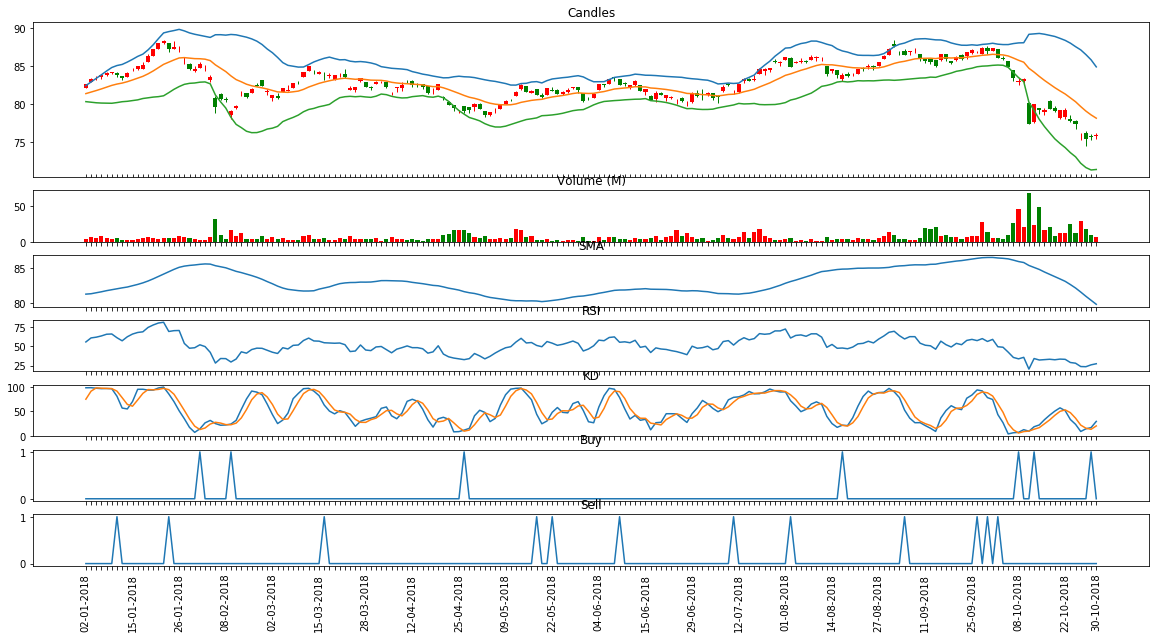

In [20]:
from talib import abstract

# 創建各種指標
SMA = abstract.SMA(df,timeperiod = 20)
RSI = abstract.RSI(df)
STOCH = abstract.STOCH(df)

from finlab.plot_candles import plot_candles
plot_candles(
             # 起始時間、結束時間
            
             start_time='2018-01-01',
             end_time='2018-10-31',
             
             # 股票的資料
             pricing=df, 
             title='Candles', 
    
             # 是否畫出成交量？
             volume_bars=True, 
    
             # 將某些指標（如SMA）跟 K 線圖畫在一起
             overlays=[BBANDS20std] ,#, SGNL_B ,SGNL_S , BBANDS20std], 
    
             # 將某些指標（如RSI, STOCH）單獨畫在獨立的畫格中
             technicals = [SMA , RSI,  STOCH , SGNL_B ,SGNL_S] ,
    
             # 重新命名額外的畫格名稱（跟指標名稱一樣就可以囉！）
             technicals_titles=['SMA' ,'RSI', 'KD' , 'Buy' , 'Sell']
            )

In [83]:
account = 5000000

selllist = []
buylist= []
for day in df.close:
    selllist.append(cost.index)
    buylist.append(revenue.index)

In [86]:
cost = df.close[SGNL_B].shift(
revenue = df.close[SGNL_S].shift()
account = 5000000
for c in cost:
    account  = account - 1000*c*(1 + (1.425/1000))
account
# for s in revenue:
#     account = account + 1000*s *(1 - (1.425/1000) - (3/1000))
# account / 5000000


date
2004-03-24      NaN
2004-05-31    46.95
2004-07-02    45.35
2004-08-31    43.92
2004-09-02    45.15
2004-09-23    45.62
2004-10-11    46.20
2004-11-11    47.15
2004-11-19    46.00
2004-12-20    47.40
2005-01-04    46.52
2005-02-17    47.49
2005-05-11    47.77
2005-05-16    46.80
2005-06-21    46.99
2005-06-24    47.50
2005-07-21    47.92
2005-08-08    48.91
2005-09-14    49.18
2005-10-05    47.75
2005-11-07    47.71
2005-11-15    46.32
2005-11-29    47.62
2005-12-08    48.52
2005-12-22    49.10
2005-12-28    50.25
2005-12-30    51.00
2006-01-10    51.25
2006-02-08    52.30
2006-02-20    52.30
              ...  
2017-01-13    72.45
2017-02-02    72.60
2017-02-08    72.90
2017-02-16    71.75
2017-03-24    73.45
2017-05-05    74.25
2017-05-12    75.15
2017-05-31    76.30
2017-06-09    76.50
2017-06-29    78.00
2017-07-21    80.65
2017-08-09    82.10
2017-08-29    82.15
2017-09-04    82.30
2017-09-19    82.85
2017-10-20    82.75
2017-11-08    84.55
2017-11-27    84.95
2018-01-10    8

In [79]:
def calculate_ret(df_data ,sell_sign , buy_sign ,account = 5000000 ):
    cost = df_data.close[buy_sign].shift(-1)
    revenue = df_data.close[sell_sign].shift(-1)
    original_account = account
    account = account
    for c in cost:
        account  = account- 1000*c*(1 + (1.425/1000))
    for s in revenue:
        account = account + 1000*s *(1 - (1.425/1000) - (3/1000))
    returns = account / original_account
    return  returns